In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [80]:
class Clustering:
    def __init__(self, path='accounts_style.csv' ):
        self.path = path
        self.data = self.__preprecessing(path)
        self.data = self.__normalize_based_on_values([2, 2, 1.5, 1.25, 1.75])

    
    def getData(self):
        return self.data

    def fit_predict(self, n_clusters=6):
        kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
        self.kmeans = kmeans
        return kmeans.fit_predict(self.data)

    
    def cluster_centers(self):
        print(self.kmeans.cluster_centers_)
        return self.kmeans.cluster_centers_


    def __preprecessing(self, path):
        #select special part of the dataframe
        data = pd.read_csv(path)
        data = data.iloc[ : ,2:]

        #spilit data and add new culomns
        data[['Age1', 'Age2', 'Age3']] = data["Age"].str.split(",", n=2, expand=True)
        data[['Color1', 'Color2', 'Color3']] = data["Color"].str.split(",", n=2, expand=True)
        data[['Pattern1', 'Pattern2', 'Pattern3']] = data["Pattern"].str.split(",", n=2, expand=True)
        data[['Size1', 'Size2', 'Size3']] = data["Size"].str.split(",", n=2, expand=True)
        data[['Formal1', 'Formal2', 'Formal3']] = data["Formal"].str.split(",", n=2, expand=True)

        #drop unusage columns
        data.drop(columns =['Age', 'Color', 'Pattern', 'Size', 'Formal'], inplace = True)

        #convert type from str to float64
        data = data.astype('float64')

        #calculate the average of each row specialy
        data['Age_avg'] = self.__special_mean(data[['Age1', 'Age2', 'Age3']].values,20)
        data['Color-avg'] = self.__special_mean(data[['Color1', 'Color2', 'Color3']].values,20)
        data['Pattern_avg'] = self.__special_mean(data[['Pattern1', 'Pattern2', 'Pattern3']].values,20)
        data['Size-avg'] = self.__special_mean(data[['Size1', 'Size2', 'Size3']].values,20)
        data['Formal_avg'] = self.__special_mean(data[['Formal1', 'Formal2', 'Formal3']].values,20)

        #drop unusage columns
        data.drop(columns =['Age1', 'Age2', 'Age3', 'Color1', 'Color2', 'Color3', 'Pattern1',
         'Pattern2', 'Pattern3', 'Size1', 'Size2', 'Size3', 'Formal1', 'Formal2', 'Formal3'], inplace = True)

        return data



    def __normalize_based_on_values(self, values):
        #normalize data from 0 to 1
        normalized_data = pd.DataFrame(preprocessing.normalize(self.data), columns=data.columns)

        #put it in -1 to +1
        normalized_data = (normalized_data - 0.5) * 2

        #change the period for each component to change the influence
        normalized_data = normalized_data * values
        return data


    def __special_mean(self, selectedClothes, anomaly):
        # we have to ignore anomaly values in each component to have accessed the real mean value
        meanVector = []
        for i in range(np.shape(selectedClothes)[0]):
            componentSum = 0
            count = 0
            for j in range(np.shape(selectedClothes)[1]):
                if(selectedClothes[i][j] != anomaly):
                    componentSum += selectedClothes[i][j]
                    count += 1
            meanVector.append(componentSum/count)

        return meanVector




In [81]:
def __special_mean(selectedClothes, anomaly):
        # we have to ignore anomaly values in each component to have accessed the real mean value
        meanVector = []
        for i in range(np.shape(selectedClothes)[0]):
            componentSum = 0
            count = 0
            for j in range(np.shape(selectedClothes)[1]):
                if(selectedClothes[i][j] != anomaly):
                    componentSum += selectedClothes[i][j]
                    count += 1
            meanVector.append(componentSum/count)

        return meanVector

## Finding the best n_cluster for Kmeans algourithm

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


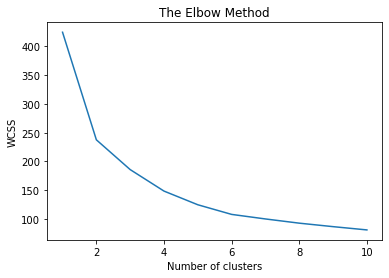

In [82]:
data = pd.read_csv('accounts_style.csv')
data = data.iloc[ : ,2:]

#spilit data and add new culomns
data[['Age1', 'Age2', 'Age3']] = data["Age"].str.split(",", n=2, expand=True)
data[['Color1', 'Color2', 'Color3']] = data["Color"].str.split(",", n=2, expand=True)
data[['Pattern1', 'Pattern2', 'Pattern3']] = data["Pattern"].str.split(",", n=2, expand=True)
data[['Size1', 'Size2', 'Size3']] = data["Size"].str.split(",", n=2, expand=True)
data[['Formal1', 'Formal2', 'Formal3']] = data["Formal"].str.split(",", n=2, expand=True)

#drop unusage columns
data.drop(columns =['Age', 'Color', 'Pattern', 'Size', 'Formal'], inplace = True)

#convert type from str to float64
data = data.astype('float64')

#calculate the average of each row specialy
data['Age_avg'] = __special_mean(data[['Age1', 'Age2', 'Age3']].values,20)
data['Color-avg'] = __special_mean(data[['Color1', 'Color2', 'Color3']].values,20)
data['Pattern_avg'] = __special_mean(data[['Pattern1', 'Pattern2', 'Pattern3']].values,20)
data['Size-avg'] = __special_mean(data[['Size1', 'Size2', 'Size3']].values,20)
data['Formal_avg'] = __special_mean(data[['Formal1', 'Formal2', 'Formal3']].values,20)

#drop unusage columns
data.drop(columns =['Age1', 'Age2', 'Age3', 'Color1', 'Color2', 'Color3', 'Pattern1',
'Pattern2', 'Pattern3', 'Size1', 'Size2', 'Size3', 'Formal1', 'Formal2', 'Formal3'], inplace = True)
         
#preprocessing
data = pd.DataFrame(preprocessing.normalize(data), columns=data.columns)
data = (data - 0.5) * 2
data = data * [2, 2, 1.5, 1.25, 1.75]

#visualizing different clusters value and find the best one
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [83]:
#the best value for n_cluster is 6

## testing


In [84]:
clustering = Clustering()
data = clustering.getData()
answers = clustering.fit_predict()
data['Cluster'] = answers
data



,Age_avg,Color-avg,Pattern_avg,Size-avg,Formal_avg,Cluster
0,-0.351673,0.747211,-1.087918,-0.219796,-0.307714,4
1,-0.045289,0.443389,-1.133492,-0.333729,-0.039628,4
2,-0.845299,0.886751,-1.066987,-0.167468,-0.234456,0
3,-0.780011,1.049971,-1.042504,-0.487507,-0.148765,0
4,-0.718975,0.562050,-1.019616,-0.049039,-0.068654,4
...,...,...,...,...,...,...
395,-0.166603,-0.166603,-0.949981,-0.333302,0.495911,4
396,-0.592805,0.814390,-0.233524,-0.546402,-0.518704,5
397,-0.492443,0.713602,-0.143199,-0.307777,-0.958533,5
398,-0.158851,-0.158851,0.157034,-0.329425,-0.461196,2


In [85]:
clustering.cluster_centers

<bound method Clustering.cluster_centers of <__main__.Clustering object at 0x000001CA27BC4C70>>